# Ejercicio 3 - Operación de apertura

In [2]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import cv2 as cv

## Carga de la imagen

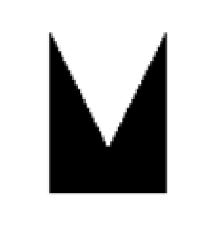

In [228]:
img = cv.imread('../resources/fig-ex3.jpg', cv.IMREAD_GRAYSCALE) / 255

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [225]:
def invert_colors(img):
    return (img <= 0.5).astype(np.uint8)

In [249]:
def plot_comparison(imgs, titles, suptitle):
    N = len(imgs)

    fig, ax = plt.subplots(1, N, figsize=(N*5, 8))    
    fig.suptitle(suptitle, fontsize=18)
    fig.tight_layout(rect=[0, 0.15, 1, 1])
    for k in range(N):
        ax[k].imshow(imgs[k], cmap='gray')
        ax[k].axis('off')
        ax[k].set_title(titles[k], fontsize=15)
    plt.show()

In [253]:
def apply_opening(img, kernel):
    eroded = cv.erode(img,kernel,iterations = 1) 
    return cv.dilate(eroded,kernel,iterations = 1)

In [168]:
def apply_opening_cv(img, kernel):
    return cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

In [207]:
def get_circular_kernel(radius):
    Y, X = np.ogrid[:2*radius + 1, :2*radius + 1]
    dist_from_center = np.sqrt((X - radius)**2 + (Y - radius)**2)
    return (dist_from_center < radius).astype(np.uint8)

In [256]:
def plot_opening(img, r):
    # Invert colors, morphologic filter acts over 1's, whites.
    img_neg = invert_colors(img)
    # Programmable opening radius
    kernel = get_circular_kernel(r)
    opening = invert_colors(apply_opening(img_neg, kernel))
    opening_cv = invert_colors(apply_opening_cv(img_neg, kernel))    
    plot_comparison([img, opening, opening_cv], ['Imagen original', 'Filtrado propio', 'Filtrado OpenCV'], f'Radius={r}px')

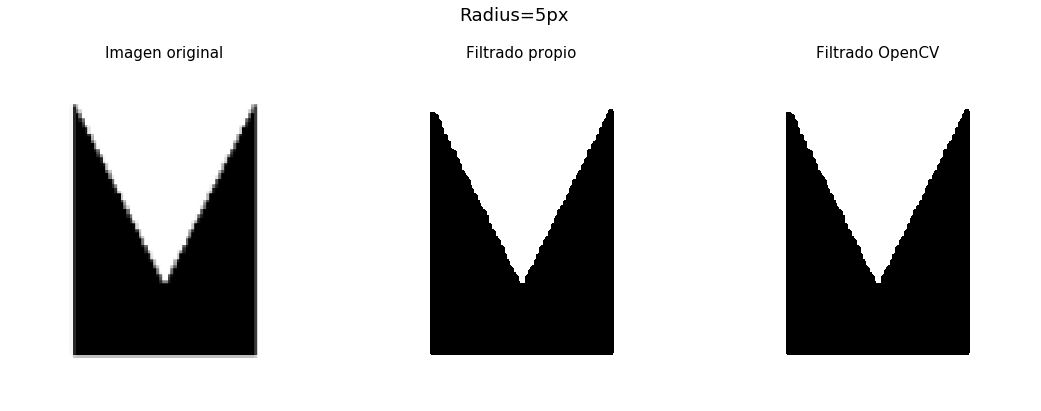

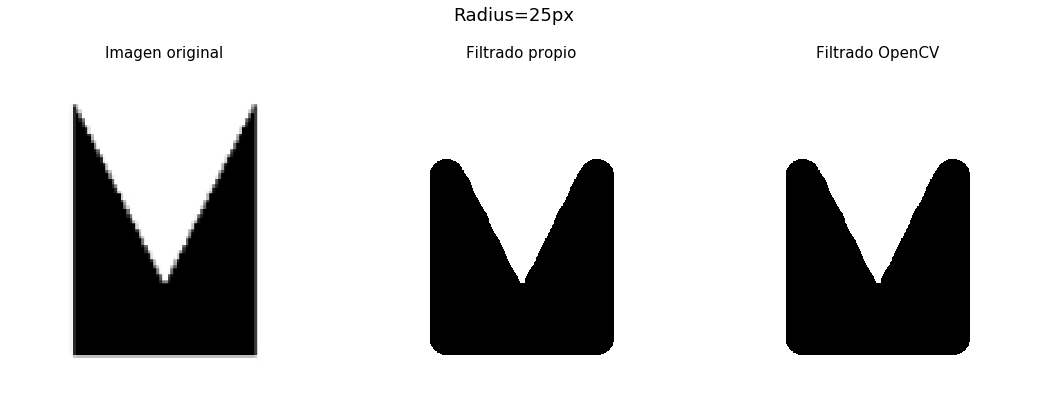

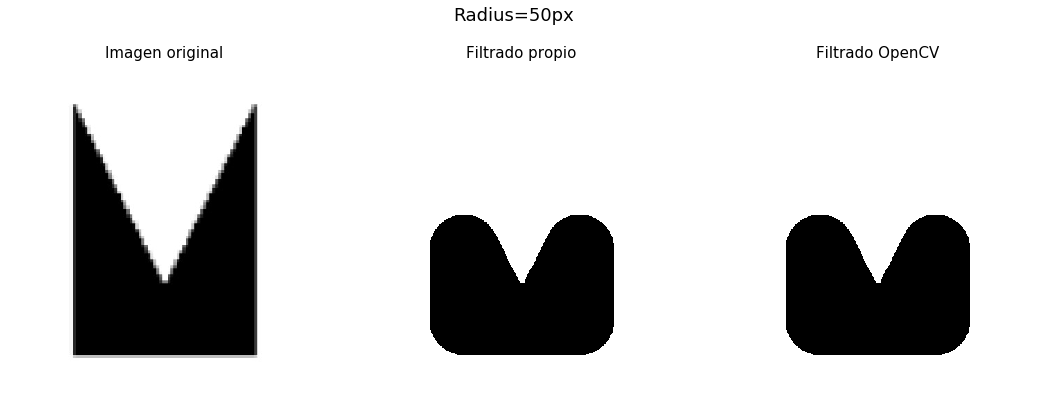

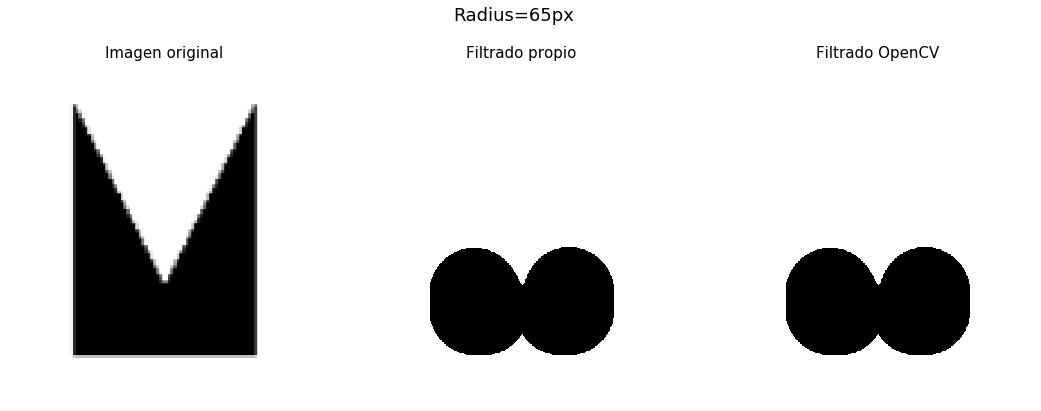

In [260]:
opening = apply_opening(img_neg, kernel)
opening_cv = apply_opening_cv(img_neg, kernel)
rs = [5, 25, 50, 65]
for r in rs:
    plot_opening(img, r)

Se aplica la operación de dos formas. En primer lugar, usando la erosión y dilación de OpenCV, con cv.erode() y cv.dilate(). Luego, usando directamente la apertura de OpenCV, cv.morphologyEx(_, cv.MORPH_OPEN, _). Se observa que el resultado es el mismo. 
Si bien para la operación de apertura sería esperable que las dos partes de la figura se separen, esto no es así por la forma del elemento estructural utilizado y la forma de la figura. 

Cuando la erosión logra separar ambos lados, queda muy poco de la forma original, lo cual se puede observar para r=65px.

<b>Nota:</b> Para la aplicación del filtro se invirtieron los colores, dado que el filtrado morfológico opera sobre los blancos.